# Présentation de notre projet

Le but de ce TP est d’implémenter un programme python capable d’interpréter une chaîne de Markov ou un processus de décision markovien donné par l’utilisateur pour vérifier sa correction, la simuler et l’afficher graphiquement mais aussi lui appliquer quelques méthodes usuelles de model checking et d'apprentissage par renforcement.

In [1]:
from mdp import *

# Modélisation

## Structure de Donnée
Afin de représenter une chaîne de markov ou un processus de décision Markovien, nous définissons une classe d’objet MDP.
Celle-ci contient une liste d’états représentés par leurs labels, une liste des actions qu’il est possible de réaliser, ainsi qu’un dictionnaire ayant pour clé les actions et pour valeurs des matrices dans laquelle chaque entrée correspond à un état et à l’état suivant avec le poids de cette transition. A noter qu’une bonne partie de ces poids peuvent être égaux à 0 s’il n’existe pas de transition menant d’un certain état à un autre pour une action considérée.
On ajoute l’attribut possible_actions qui indique pour chaque état quelles sont les différentes actions possibles. On représente le cas sans action comme une action None.

Pour le test et la représentation graphique on rajoute finalement l’attribut accessible qui permettra d’identifier les états inaccessibles depuis l’état initial, ainsi que graph et blue_state.

La méthode summary affiche sur la console un résumé des attributs de l’objet.
## Parsing
La réalisation du Parsing s’appuie pour la partie grammaire sur un programme fourni par l’équipe pédagogique et qu’il nous suffit d’interpréter.

Pour pouvoir associer notre classe MDP définie plus haut à l’objet  gramPrintListener fourni on ajoute à ce dernier un attribut mdp de la classe MDP que l’o va modifier au fur et à mesure de la lecture du fichier.

On procède pour cela en 3 étapes:
La première est de déterminer l’ensemble des états et de les insérer dans mdp.states.
On fait ensuite de même avec actions.
Puis pour chaque transition, qu’elle soit avec ou sans action, on récupère l’état de départ et les différents états d’arrivée avec leurs poids. On peut alors compléter la matrice de transition (quitte à l'ajouter si besoin) dans mdp.transition. En outre, on ajoute l’action ou None dans les actions possibles depuis l’état de départ de la transition.
## Cas de mdp incomplets
Les fichiers entrés par l’utilisateur peuvent parfois être incomplets, comment notre programme gère les différents cas:
Si aucun état n’est défini: Le programme s'interrompt sur une erreur.
Si une transition a seulement des poids nuls: celle-ci n’est pas prise en compte.
Si un état non défini apparait dans les transitions: On ajoute ce nouvel état
Si une action non définie apparaît dans les transitions: on ajoute cette nouvelle action.
## Testing
Le test vise à repérer des problèmes qui n’ont pas été repérés durant le parsing, c’est à dire les situations suivantes:
Si les dimensions d’une matrice de transition ne correspondent pas au nombre d’états ( ce qui peut être dû à l'ajout d’un état au cours du parsing): On complète les matrices avec des 0.
Si un état n’a aucune transition: une transition vers lui même est ajoutée
Si un état a à la fois des transitions avec et sans action: Dans le cas d’une simulation automatique le cas sas action sera toujours privilégié
Si un état est inaccessible: Cela est signalé à l’utiisateur.
## Affichage Graphique
Pour l’affichage graphique, on utilise pydot afin de créer un graphe représentant la chaîne de Markov.
Chaque état est relié à un nœud. Les actions possibles depuis un nœud correspondent également à des nœuds réduits à un simple point. Les transitions et choix d’actions sont représentés par des arêtes dont le label est soit l’action pour les arêtes menant d’un état à un point action, soit les poids pour les transitions.
On introduit également une méthode update qui prend en entrée l’état actuel et le colore en bleu. Cette méthode ne sera utilisée qu’à la demande de l’utilisateur.

## Simulation
Pour la simulation nous avons choisis d’implémenter deux modes :
Automatique
Manuel
Le mode manuel n’est utilisé que pour les processus de décisions markoviens (MDP) car ceux-ci requiert de faire un choix sur les actions possible depuis un sommet.
### Mode Automatique
Le mode automatique est assez simple, il choisit l’action sortante du sommet aléatoirement avec la fonction choice de la librairie random.

### Mode Manuel
Le mode manuel affiche simplement les actions possibles dans le sommet actuel et demande à l’utilisateur d'en choisir une.

Une fois l’action choisie (par le mode automatique ou par l’utilisateur), il suffit de choisir quelle transitions effectuer en fonction de leurs probabilités respectives.
Pour cela on utilise la fonction choices de la librairie random qui elle prend en compte les poids de chaque arêtes dans le choix de la transition.

Maintenant il suffit simplement d’itérer afin d’avoir une simulation complète.
### Conditions d'arrêt :
Il y a deux conditions pour que la simulation s’arrête :
On atteint le nombre maximum d’itérations choisies en paramètre de la fonction.
On atteint un sommet “final”, qui boucle sur lui-même avec une probabilité de 1.

## Exemple de modélisation de Chaîne de Markov

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['I', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
Actions defined by the user : ['a']
Transition from I with no action and targets ['T1', 'T2'] with weights [1, 1]
Transition from T1 with no action and targets ['T3', 'T4'] with weights [1, 1]
Transition from T2 with no action and targets ['T5', 'T6'] with weights [1, 1]
Transition from T3 with no action and targets ['S1', 'T1'] with weights [1, 1]
Transition from T4 with no action and targets ['S2', 'S3'] with weights [1, 1]
Transition from T5 with no action and targets ['S4', 'S5'] with weights [1, 1]
Transition from T6 with no action and targets ['S6', 'T2'] with weights [1, 1]
Transition from S1 with no action and targets ['S1'] with weights [1]
Transition from S2 with no action and targets ['S2'] with weights [1]
Tr

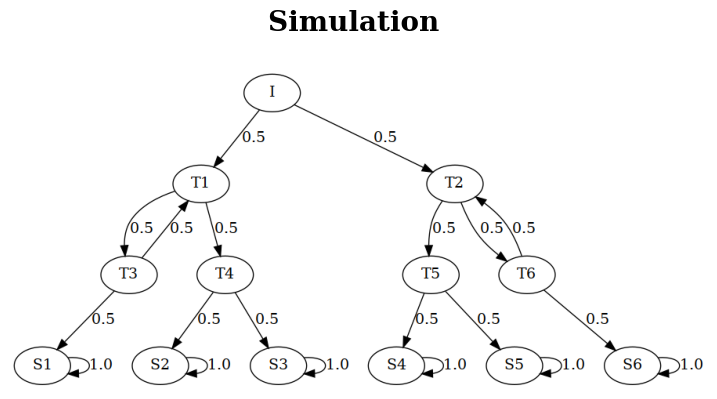

Simulation automatique ? Y/N 
Y
Animation graphique? Y/N 
Y

Starting Simulation
--------------------
Max transitions : 100
--------------------
Starting states : I


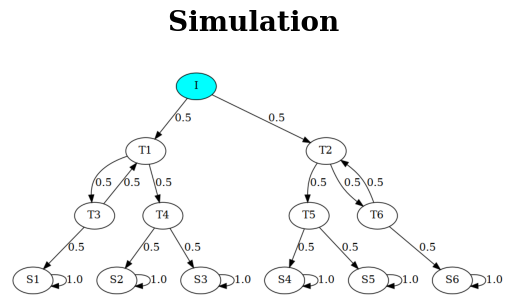

0: Transition from I to T2


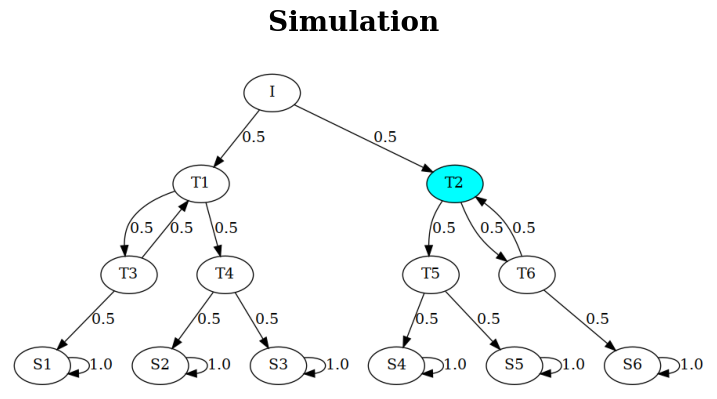

1: Transition from T2 to T5


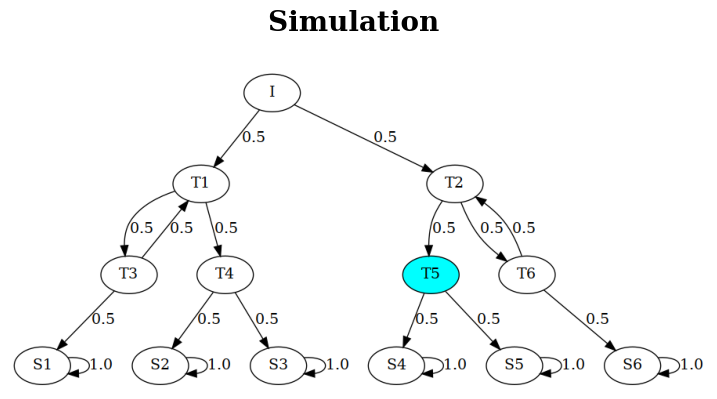

2: Transition from T5 to S5


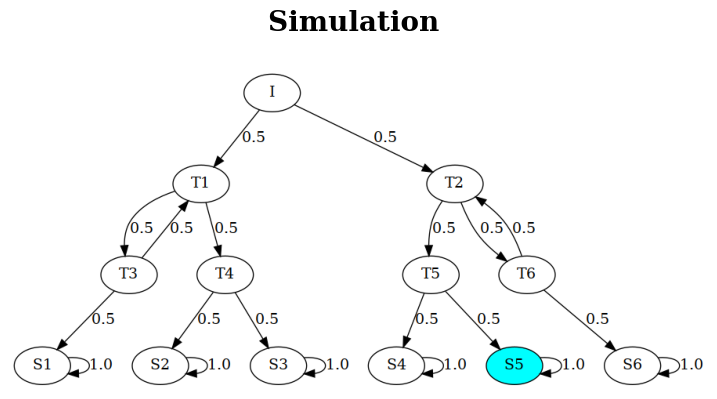

This state loop on himself, ending simulation.


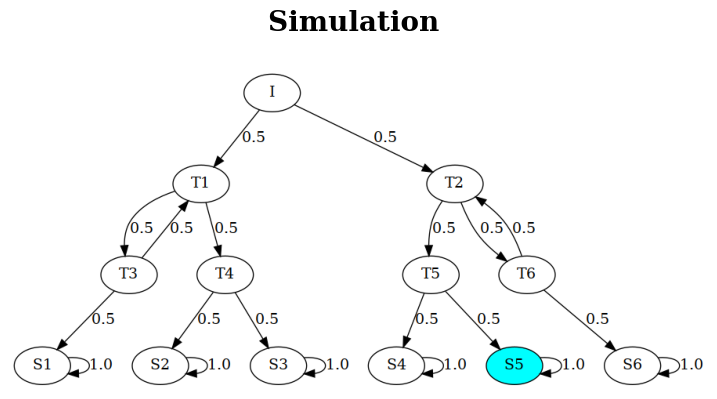

In [2]:
mdp = open("simu-mc.mdp")
mdp.print()
mdp.simulate(max_steps = 100)

## Exemple de Modélisation de Processus de Décision Markovien

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S11', 'S12', 'S13', 'S14', 'S21', 'S22', 'S23', 'S24', 'S31', 'S32', 'L', 'S34', 'S41', 'S42', 'S43', 'W']
Actions defined by the user : ['a', 'b', 'c']
Transition from S11 with action a and targets ['S21', 'L', 'S22'] with weights [3, 1, 1]
Transition from S11 with action b and targets ['S12', 'S22', 'L'] with weights [3, 1, 1]
Transition from S11 with action c and targets ['S22', 'S12', 'S21'] with weights [2, 1, 1]
Transition from S12 with action a and targets ['S22', 'S21', 'S23'] with weights [3, 1, 1]
Transition from S12 with action b and targets ['S13', 'S23', 'L'] with weights [3, 1, 1]
Transition from S12 with action c and targets ['S23', 'S22', 'S13'] with weights [2, 1, 1]
Transition from S13 with action a and targets ['S23', 'S22', 'S24'] with weights [3, 1, 1]
Transition from S13 wi

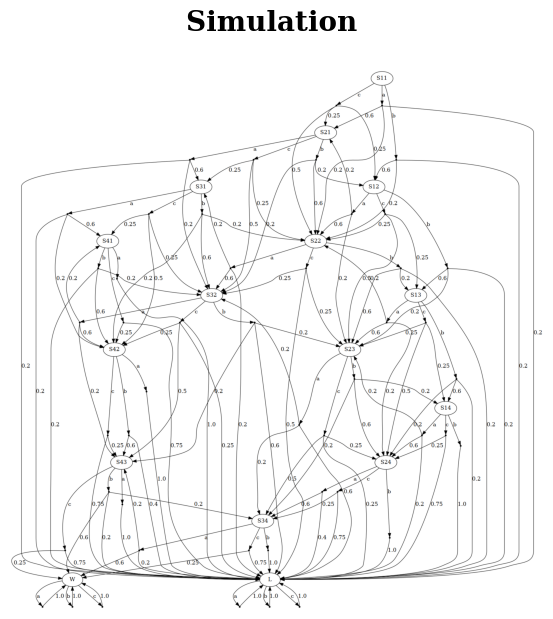

Simulation automatique ? Y/N 
Y
Animation graphique? Y/N 
Y

Starting Simulation
--------------------
Max transitions : 100
--------------------
Starting states : S11


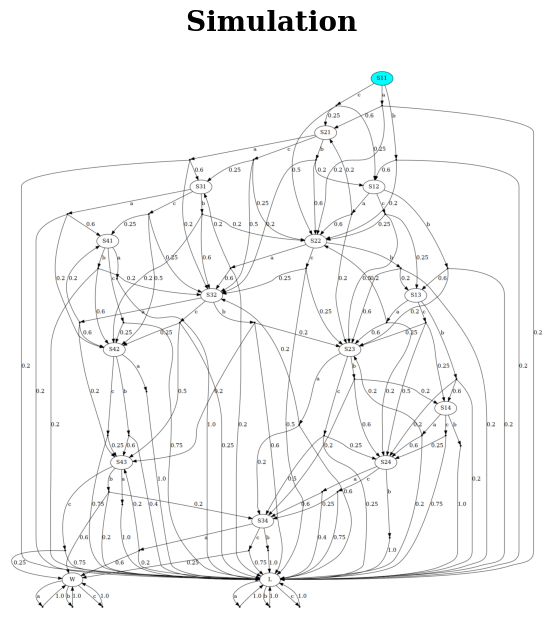

0: Transition from S11 to S22 using action c


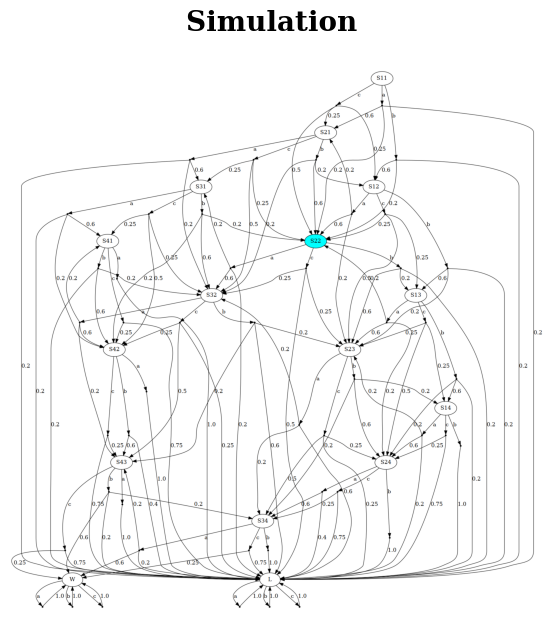

1: Transition from S22 to S23 using action c


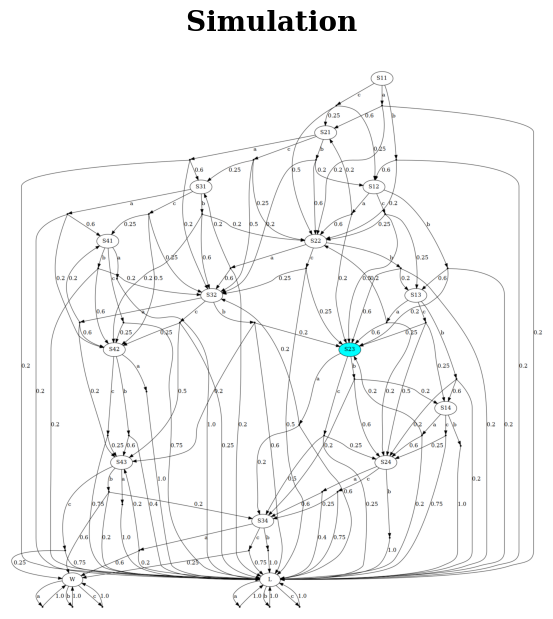

2: Transition from S23 to S34 using action b


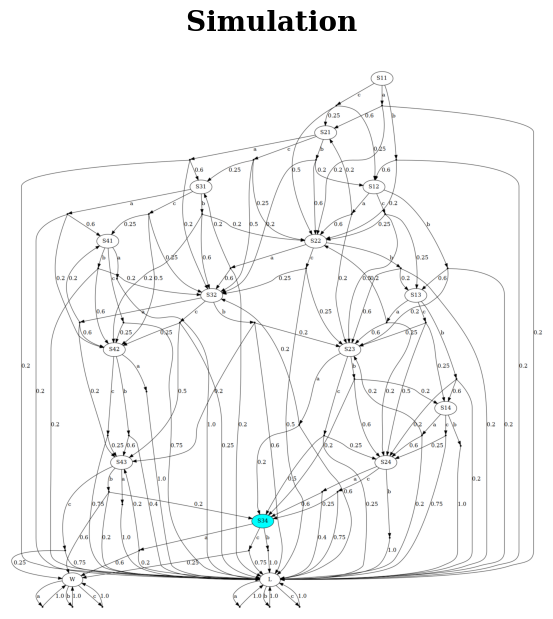

3: Transition from S34 to W using action a


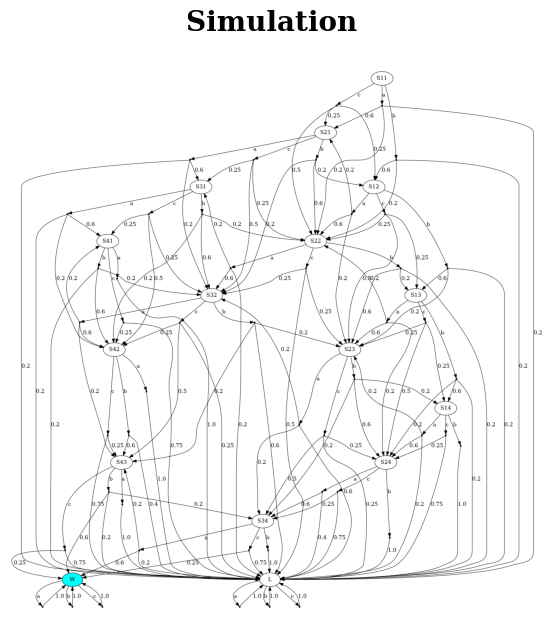

This state loop on himself, ending simulation.


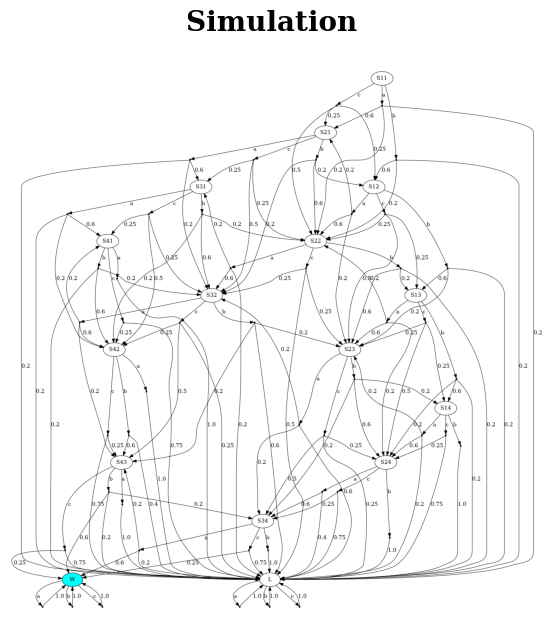

In [3]:
mdp = open("simu-mdp.mdp")
mdp.print()
mdp.simulate(max_steps = 100)

# Model Checking
## Model Checking Probabiliste
### Chaînes de Markov
On écrit un programme permettant de mesurer les probabilités de respect de la propriété until, c’est à dire calculer P(♦S) ou P($♦^{≤k}$S).

Pour cela on commence par déterminer S1 l’ensemble des états vérifiant à coup sûr la propriété. On prend simplement S1 l’état ou l’ensemble d’états S donnés par l’utilisateur.

Pour déterminer S0, un ensemble d’états ne vérifiant pas la propriété, on prend l’ensemble des états n’appartenant pas à S1 et bouclant sur eux même.

Les états de S? sont les états restants.

Pour construire A et b, on utilise notre matrice de transition (réduite à la seule “action” None car nous sommes dans une chaîne de Markov).

On commence par retirer l’ensemble des lignes correspondant à S0 et S1.
b est alors la somme des colonnes correspondant à S1 et on finit par obtenir A en retirant l’ensemble des colonnes correspondant à S0 et S1.

Finalement, si k = None (le cas P(♦S)) on trouve les points fixes de Γ(y)=Ay+b à l’aide de la méthode solve du module linalg de la bibliothèque Numpy.

Sinon on calcule Γ(y)(k).


ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['II', 'CI', 'AI', 'CC', 'CA', 'AC', 'AA', 'F', 'B']
Actions defined by the user : ['a']
Transition from II with no action and targets ['CI', 'AI'] with weights [2, 1]
Transition from CI with no action and targets ['CC', 'CA'] with weights [2, 1]
Transition from AI with no action and targets ['AC', 'AA'] with weights [2, 1]
Transition from CC with no action and targets ['F', 'B'] with weights [1, 1]
Transition from CA with no action and targets ['F'] with weights [1]
Transition from AC with no action and targets ['F'] with weights [1]
Transition from AA with no action and targets ['B'] with weights [1]
Transition from F with no action and targets ['F'] with weights [1]
Transition from B with no action and targets ['B'] with weights [1]

--------------
End of parsing

Begin testing
--------------



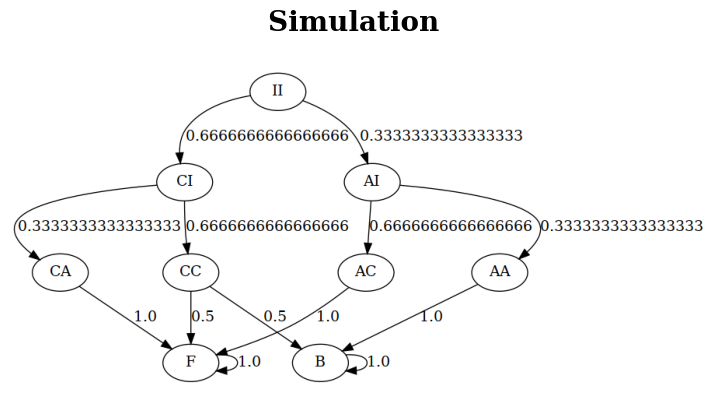

S1 :['F', 'CA', 'AC']
S0 :['B', 'AA']
P(♦F): [[0.66666667]
 [0.66666667]
 [0.66666667]
 [0.5       ]]
S1 :['F', 'CA', 'AC']
S0 :['B', 'AA']
P(♦≤kF): [[0.66666667]
 [0.66666667]
 [0.66666667]
 [0.5       ]]


In [4]:
mdp = open("fichier2-mc.mdp")
mdp.print()
print(f"P(♦F): {mdp.modelcheckMC('F')}")
print("P(♦≤10 F): " + f"{mdp.modelcheckMC('F', 10)}")

### Processus de Décision Markovien
On va chercher à trouver Pmax(♦S ) la probabilité de la propriété until S maximale si on prend le meilleur adversaire pour cela.
S1 est défini de la même façon que pour la chaîne de Markov.

Pour déterminer S0, un ensemble d’états ne vérifiant pas la propriété, on prend l’ensemble des états n’appartenant pas à S1 et bouclant sur eux même pour toutes leurs actions.

Pour construire A et b… 

Pmax(♦S ) est alors égal à la solution minimale de A.x ≥ b. On résout cette inéquation avec la méthode linprog du module optimize de la bibliothèque scipy.

Pmin(♦S ) est égal à la solution maximale de A.x ≤ b. Nous ne somme pas parvenus à résoudre numériquement cette inéquation à l’aide des méthodes de scipy.



ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S11', 'S12', 'S13', 'S14', 'S21', 'S22', 'S23', 'S24', 'S31', 'S32', 'L', 'S34', 'S41', 'S42', 'S43', 'W']
Actions defined by the user : ['a', 'b', 'c']
Transition from S11 with action a and targets ['S21', 'L', 'S22'] with weights [3, 1, 1]
Transition from S11 with action b and targets ['S12', 'S22', 'L'] with weights [3, 1, 1]
Transition from S11 with action c and targets ['S22', 'S12', 'S21'] with weights [2, 1, 1]
Transition from S12 with action a and targets ['S22', 'S21', 'S23'] with weights [3, 1, 1]
Transition from S12 with action b and targets ['S13', 'S23', 'L'] with weights [3, 1, 1]
Transition from S12 with action c and targets ['S23', 'S22', 'S13'] with weights [2, 1, 1]
Transition from S13 with action a and targets ['S23', 'S22', 'S24'] with weights [3, 1, 1]
Transition from S13 wi

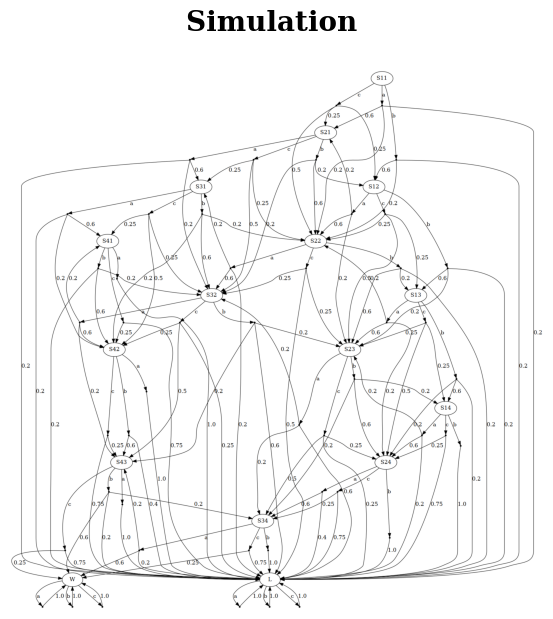

Calcul de pmax(♦W) : 
[0.42460938 0.46015625 0.4640625  0.36875    0.46015625 0.3890625
 0.49375    0.45       0.4640625  0.49375    0.75       0.36875
 0.45       0.75      ]


In [5]:
mdp = open("simu-mdp.mdp")
mdp.print()
print("Calcul de pmax(♦W) : \n" + str(mdp.modelcheckMDP("W")[1]))

## Model Checking Statistique
Nous avons implémenté deux algorithmes de model checking statistique, qui ont chacun leur particularité.

Les algorithmes suivants vont faire un certain nombre de simulation, pour rendre cela plus pratique nous avons créé une nouvelle fonction qui reprend les fonctionnalités de la simulation décrite dans la partie Modélisation en enlevant l’affichage graphique et la partie qui choisit les actions car on se limite aux chaînes de Markov. 
### Monte-Carlo
Avec l’algorithme de Monte-Carlo on va obtenir directement la probabilité d’atteindre un état avec une précision choisie ɛ et un taux d’erreur δ, on note cette probabilité P(♦S).
On peut aussi choisir de trouver la probabilité P(♦≤kS) (Finir dans l’état S avec maximum k transitions)

Notre implémentation suppose que l’état S cible est un état “final”

L’idée est de faire un nombre N de simulation et de compter le nombre de simulation qui finissent dans l’état cible (i.e. le nombre de simulation vérifiant la propriété ♦S ou ♦≤kS), que l’on divise ensuite par le nombre de simulation effectuées.

On calcul la valeur de N grâce à la formule de Chernoff-Hoeffding :  
N  ≥ $ ln(2) - ln(\sigma) \over (2\epsilon)²$  ⇒P(|$\gamma_N - \gamma$|≥ε) ≤ $\sigma$



ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
Actions defined by the user : ['a']
Transition from S0 with no action and targets ['S1', 'S2'] with weights [1, 1]
Transition from S1 with no action and targets ['S3', 'S4'] with weights [1, 1]
Transition from S2 with no action and targets ['S5', 'S6'] with weights [1, 1]
Transition from S3 with no action and targets ['S1', 'T1'] with weights [1, 1]
Transition from S4 with no action and targets ['T2', 'T3'] with weights [1, 1]
Transition from S5 with no action and targets ['T4', 'T5'] with weights [1, 1]
Transition from S6 with no action and targets ['S2', 'T6'] with weights [1, 1]

--------------
End of parsing

Begin testing
--------------
By default a transition on himself is added.

By default a transition on himsel

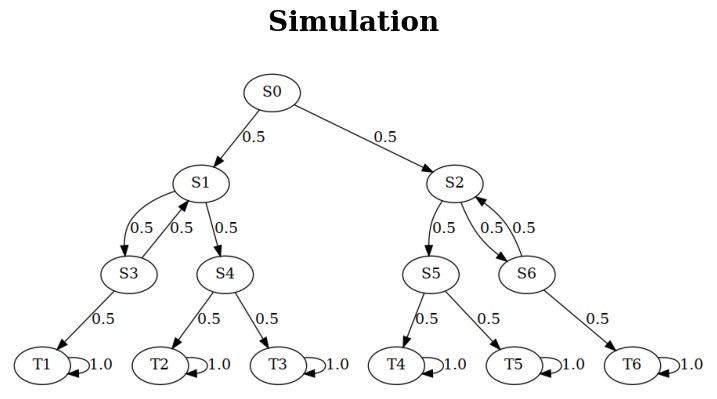

Probabilité obtenues avec Monte-Carlo :
[0.1625396346066737, 0.15393326287181036, 0.15627359202778196, 0.16125622829533445, 0.1542352408274196, 0.15695304242790276]


In [6]:
mdp = open("dice.mdp")
mdp.print()
proba = [mdp.MonteCarlo(f"T{i}", 5, 0.01, 0.01) for i in range(1,7)]
print('Probabilité obtenues avec Monte-Carlo :\n' + str(proba))

### SPRT (Sequential Probability Ratio Test)
Cet algorithme permet de valider ou d’invalider un propriété de cette forme : P(♦≤kS) ≥ Θ 
avec Θ une probabilité choisie.

On va choisir de plus une précision ε sur cette validation.

On a de plus besoin de 𝛂 et 𝜷 qui vont nous servir respectivement d’erreur sur la validation et l’invalidation.

L’idée de l’algorithme SPRT est de comparer deux hypothèse H0 et H1 définit de la sorte :

H0 : γ ≥ γ0

H1 : γ ＜ γ1

On définit donc γ0 = γ + ε et γ1 = γ - ε

On définit de plus Rm une valeur représentative du nombre de simulation “acceptés” comparé au nombre de simulation totale m.

A chaque nouvelle simulation on actualise la valeur de Rm et on la compare à des valeurs A et B :
Si Rm ≥ A on accepte l’hypothèse H1
Si Rm ≤ B on accepte l’hypothèse H0
Nous avons choisi A = $1 - \beta \over 𝛂$  et B = $\beta \over 1 - \alpha$

In [7]:
Hyps = [f"T{i}: {mdp.SPRT(f'T{i}', 5, 0.01, 0.01, 0.16, 0.01, 30_000)}" for i in range(1,7)]
for hyp in Hyps :
    print(hyp)

T1: On valide l'hypothèse P(♦T1) <= 0.16 - 0.01
T2: On valide l'hypothèse P(♦T2) <= 0.16 - 0.01
T3: On valide l'hypothèse P(♦T3) <= 0.16 - 0.01
T4: On valide l'hypothèse P(♦T4) <= 0.16 - 0.01
T5: On valide l'hypothèse P(♦T5) <= 0.16 - 0.01
T6: On valide l'hypothèse P(♦T6) <= 0.16 - 0.01


### Model Checking Statistique pour les Processus de Décision Markoovien
Nous avons implémenté les algorithme proposés dans D. Henriques, J. G. Martins, P. Zuliani, A. Platzer and E. M. Clarke, "Statistical Model Checking for Markov Decision Processes," 2012 Ninth International Conference on Quantitative Evaluation of Systems, London, UK, 2012, pp. 84-93, doi: 10.1109/QEST.2012.19.

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S11', 'S12', 'S13', 'S14', 'S21', 'S22', 'S23', 'S24', 'S31', 'S32', 'L', 'S34', 'S41', 'S42', 'S43', 'W']
Actions defined by the user : ['a', 'b', 'c']
Transition from S11 with action a and targets ['S21', 'L', 'S22'] with weights [3, 1, 1]
Transition from S11 with action b and targets ['S12', 'S22', 'L'] with weights [3, 1, 1]
Transition from S11 with action c and targets ['S22', 'S12', 'S21'] with weights [2, 1, 1]
Transition from S12 with action a and targets ['S22', 'S21', 'S23'] with weights [3, 1, 1]
Transition from S12 with action b and targets ['S13', 'S23', 'L'] with weights [3, 1, 1]
Transition from S12 with action c and targets ['S23', 'S22', 'S13'] with weights [2, 1, 1]
Transition from S13 with action a and targets ['S23', 'S22', 'S24'] with weights [3, 1, 1]
Transition from S13 wi

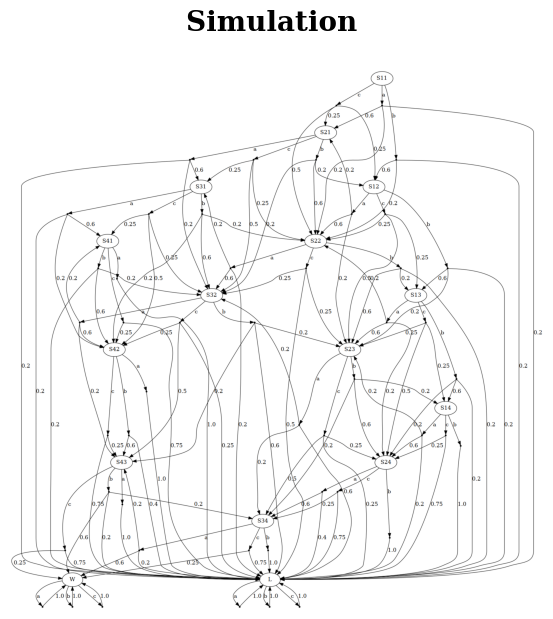

 45%|██████████████████████████████████████████████▎                                                        | 9/20 [01:20<01:38,  8.97s/it]

0.41


In [8]:
mdp = open("simu-mdp.mdp")
mdp.print()
for i in tqdm(range(50, 30, -1)):
    theta = i/100
    if not mdp.SMC4MDP('W', h=0.5, eps=0.01, N=2000, L=30, p=0.5, eta=0.1, SPRT_max_step=100, SPRT_alpha=0.01, SPRT_beta=0.01, SPRT_eps=0.01, SPRT_N=300_000, SPRT_theta=theta):
        print(theta)
        break


# Récompenses et Apprentissage par Renforcement
Pour cette partie, on lie aux états de nos Processus de Décisions Markoviens et Chaînes de Markov une notion de récompense numérique. L’objectif de l’apprentissage par renforcement est de trouver l’adversaire maximisant les récompenses récoltées.

## Récompenses : Itération de valeurs

Afin de calculer les récompenses obtenables depuis chaque état on utilise l’algorithme d’itération de valeurs.

Pour cet algorithme, on a besoin de :

- 𝛄 : le facteur de pondération, on a vu qu’il faut 𝛄＜1.
- 𝛆 : la précision sur les récompense collectées.

Nous avons implémenté l'algorithme présenté en cours. Il est applicable à la fois aux chaînes de Markov et aux processus de décisions markoviens.

Dans le cas des processus de décisions markoviens cet algorithme donne l'adversaire qui maximise les récompenses récoltées.


ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S0', 'S1', 'S2', 'S3', 'S4'], cost defined by the user [0, 5, 100, 500, 3]
Actions defined by the user : ['a', 'b', 'c']
Transition from S0 with action a and targets ['S1', 'S2'] with weights [1, 1]
Transition from S0 with action b and targets ['S3', 'S4'] with weights [1, 9]
Transition from S1 with action c and targets ['S0'] with weights [1]
Transition from S2 with action c and targets ['S0'] with weights [1]
Transition from S3 with action c and targets ['S0'] with weights [1]
Transition from S4 with action c and targets ['S0'] with weights [1]

--------------
End of parsing

Begin testing
--------------
Il n'y a pas de problèmes
--------------
End testing

Markovian Decision Process Summary
----------------------------------
States : ['S0', 'S1', 'S2', 'S3', 'S4']
Actions : ['a', 'b', 'c']
To

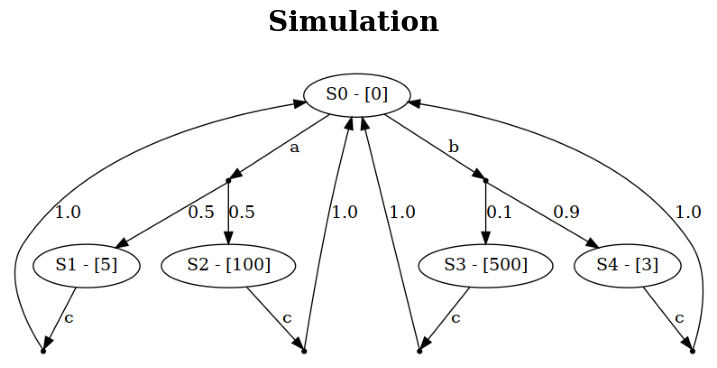

Les récompenses sont : [ 34.99609375  22.2921875  117.2921875  517.2921875   20.2921875 ]
L'adversaire correspondant est : ['b', 'c', 'c', 'c', 'c']


In [9]:
mdp = open("ex3.mdp")
mdp.print()
reward, opponent = mdp.iter_values(0.5, 1)
print("Les récompenses sont : " + str(reward))
print("L'adversaire correspondant est : " + str(opponent))

## Apprentissage par renforcement : Q-learning

ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
ANTLR runtime and generated code versions disagree: 4.11.1!=4.12.0
Begin Parsing
-------------

States defined by the user : ['S0', 'S1', 'S2', 'S3', 'S4'], cost defined by the user [0, 5, 100, 500, 3]
Actions defined by the user : ['a', 'b', 'c']
Transition from S0 with action a and targets ['S1', 'S2'] with weights [1, 1]
Transition from S0 with action b and targets ['S3', 'S4'] with weights [1, 9]
Transition from S1 with action c and targets ['S0'] with weights [1]
Transition from S2 with action c and targets ['S0'] with weights [1]
Transition from S3 with action c and targets ['S0'] with weights [1]
Transition from S4 with action c and targets ['S0'] with weights [1]

--------------
End of parsing

Begin testing
--------------
Il n'y a pas de problèmes
--------------
End testing

Markovian Decision Process Summary
----------------------------------
States : ['S0', 'S1', 'S2', 'S3', 'S4']
Actions : ['a', 'b', 'c']
To

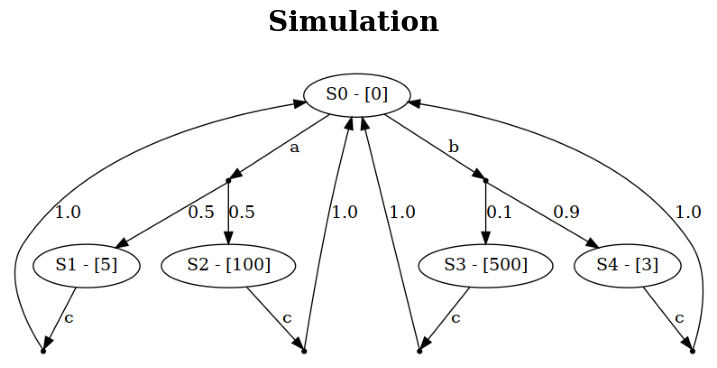

array([[ 34.84494678,  35.3631485 ,   0.        ],
       [  0.        ,   0.        ,  22.3719031 ],
       [  0.        ,   0.        , 117.37025378],
       [  0.        ,   0.        , 517.18713388],
       [  0.        ,   0.        ,  20.38253695]])

In [10]:
mdp = open("ex3.mdp")
mdp.print()
mdp.Q_Learning(100_000, 0.5)